In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

In [ ]:
os.chdir('/content/drive/MyDrive/class/areopag/children')

##Задача 1

Напишите SQL запрос, который для всех задач, открытых на момент времени T, выведет:

- ключ задачи
- время создания задачи
- статус на момент T

Задача считается открытой на момент времени T, если к этому времени последний статус задачи был любой кроме Closed и Resolved.

Оформите запрос таким образом, чтобы, изменив дату, его можно было использовать для поиска открытых задач в любой момент времени как в прошлом, так и в настоящем.

Здесь и далее все даты и времена должны быть переведены в удобочитаемый вид.

***Редко пользуюсь SQL запросами, а если и пользуюсь, то использую SQLite, запросы которого отличаются от остальных СУБД. Предлагаю вариант с использованием библиотеки Pandas***

In [ ]:
# Откроем базу данных через pandas
db_ = sqlite3.connect('issues.db')
df_db = pd.read_sql_query('SELECT * FROM history', db_)

In [ ]:
# Выведем полученный результат
df_db.head()

,issue_key,status,minutes_in_status,previous_status,status_begin,status_end
0,C-40460,Open,113.0,None,1669363867000,1.669371e+12
1,C-40460,In Progress,6289.0,Open,1669370640119,1.669748e+12
2,C-40460,In Review,2484.0,In Progress,1669747964986,1.669897e+12
3,B-7067,Closed,NaN,Test,1668583633246,NaN
4,B-6168,In Progress,187.0,Open,1655891591619,1.655903e+12


In [ ]:
# Изменим формат дат
df_db[['status_begin', 'status_end']] = df_db[['status_begin', 'status_end']].apply(pd.to_datetime, unit='ms')

In [ ]:
# Посмотрим полученный результат
df_db.head()

,issue_key,status,minutes_in_status,previous_status,status_begin,status_end
0,C-40460,Open,113.0,None,2022-11-25 08:11:07.000,2022-11-25 10:04:00.119000064
1,C-40460,In Progress,6289.0,Open,2022-11-25 10:04:00.119,2022-11-29 18:52:44.985999872
2,C-40460,In Review,2484.0,In Progress,2022-11-29 18:52:44.986,2022-12-01 12:17:02.964999936
3,B-7067,Closed,NaN,Test,2022-11-16 07:27:13.246,NaT
4,B-6168,In Progress,187.0,Open,2022-06-22 09:53:11.619,2022-06-22 12:59:47.364000000


In [ ]:
# Создадим функцию для вывода открытых задач

def open_task(date_):
  pd_ = df_db[['issue_key', 'status_begin', 'status', 'previous_status']][(df_db['status_begin'] >= str(date_ + ' ' + '00:00:00.00000')) & (df_db['status_begin'] <= str(date_ + ' ' + '23:59:59.99999'))]
  pd_ = pd_[(pd_['previous_status'] != 'Closed') & (pd_['previous_status'] != 'Resolved')]
  return pd_[['issue_key', 'status_begin', 'status']]

In [ ]:
# Проверка работы функции
date_ = str(input('Введите дату: '))
open_task(date_)

Введите дату: 2021-12-01


,issue_key,status_begin,status
6051,A-34873,2021-12-01 08:41:17.745,Resolved
10673,E-41902,2021-12-01 13:38:45.000,Open


### Задача 2

Для каждой недели распечатайте топ-3 пользователей, потребивших наибольшее количество машиночасов (количество часов, затраченных машиной на обработку задачи).
Выведите для данных пользователей процент потребленных ресурсов от общего объема расчетов за эту неделю.

In [ ]:
# Открываем файл
df_ = pd.read_csv('task_history.csv')

In [ ]:
# Смотрим содержание файла
df_.head()

,task_id,start_time,finish_time,status,worker,build_name,author,project
0,44973,2005-06-26 09:05:45.716,2005-06-26 09:05:45.997,success,worker_00,test_cyan_texture,Kenny Smith,Halo Anniversary
1,44974,2005-06-26 09:05:46.200,2005-06-26 09:05:46.497,success,worker_01,test_cyan_texture,Kenny Smith,Halo Anniversary
2,44975,2005-06-26 09:05:47.357,2005-06-26 09:06:01.213,success,worker_02,test_cyan_texture,Kenny Smith,Halo Anniversary
3,44977,2005-06-26 09:06:19.273,2005-06-26 09:10:44.734,success,worker_02,test_cyan_texture,Kenny Smith,Halo Anniversary
4,44979,2005-06-26 09:12:00.883,2005-06-26 09:14:29.941,success,worker_04,test_cyan_texture,Kenny Smith,Halo Anniversary


In [ ]:
# Смотрим информацию
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160492 entries, 0 to 160491
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   task_id      160492 non-null  int64 
 1   start_time   160492 non-null  object
 2   finish_time  160492 non-null  object
 3   status       160492 non-null  object
 4   worker       160492 non-null  object
 5   build_name   160492 non-null  object
 6   author       160492 non-null  object
 7   project      160492 non-null  object
dtypes: int64(1), object(7)
memory usage: 9.8+ MB


In [ ]:
# Перведем данные в необходимый формат и сохраним в новом датасете
df_test = pd.DataFrame()
df_test['author'] = df_['author']
df_test['date'] = pd.to_datetime(df_['start_time']).dt.normalize()
df_test[['start', 'finish']] = df_[['start_time', 'finish_time']].apply(pd.to_datetime)
df_test['week'] = pd.to_datetime(df_['start_time']).dt.week

<ipython-input-12-6d62d59ece21>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_test['week'] = pd.to_datetime(df_['start_time']).dt.week


In [ ]:
# Смотрим полученный результат
df_test.head()

,author,date,start,finish,week
0,Kenny Smith,2005-06-26,2005-06-26 09:05:45.716,2005-06-26 09:05:45.997,25
1,Kenny Smith,2005-06-26,2005-06-26 09:05:46.200,2005-06-26 09:05:46.497,25
2,Kenny Smith,2005-06-26,2005-06-26 09:05:47.357,2005-06-26 09:06:01.213,25
3,Kenny Smith,2005-06-26,2005-06-26 09:06:19.273,2005-06-26 09:10:44.734,25
4,Kenny Smith,2005-06-26,2005-06-26 09:12:00.883,2005-06-26 09:14:29.941,25


In [ ]:
# Проверим информацию
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160492 entries, 0 to 160491
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   author  160492 non-null  object        
 1   date    160492 non-null  datetime64[ns]
 2   start   160492 non-null  datetime64[ns]
 3   finish  160492 non-null  datetime64[ns]
 4   week    160492 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(1)
memory usage: 6.1+ MB


In [ ]:
# Проведем расчет рабочего времени (в часах) и запишем результат в отдельный столбец
df_test['work_time'] = (df_test['finish']-df_test['start'])/np.timedelta64(1,'h')

In [ ]:
# Смотрим полученный результат
df_test.head()

,author,date,start,finish,week,work_time
0,Kenny Smith,2005-06-26,2005-06-26 09:05:45.716,2005-06-26 09:05:45.997,25,0.000078
1,Kenny Smith,2005-06-26,2005-06-26 09:05:46.200,2005-06-26 09:05:46.497,25,0.000082
2,Kenny Smith,2005-06-26,2005-06-26 09:05:47.357,2005-06-26 09:06:01.213,25,0.003849
3,Kenny Smith,2005-06-26,2005-06-26 09:06:19.273,2005-06-26 09:10:44.734,25,0.073739
4,Kenny Smith,2005-06-26,2005-06-26 09:12:00.883,2005-06-26 09:14:29.941,25,0.041405


In [ ]:
# Посмотрим сколько недель есть в данных
df_test['week'].unique()

array([25, 26, 28, 27])

In [ ]:
# Создадим понедельно датасеты и проведем расчет. Объеденим данные в один датасет и выведем топ-3
df_25 = df_test[['author', 'work_time']][df_test['week'] == 25].groupby('author').sum()
df_25['percentage'] = df_25['work_time'].apply(lambda x: x*100/df_25['work_time'].sum())
df_25 = df_25.sort_values(by='work_time', ascending=False).head(3)

df_26 = df_test[['author', 'work_time']][df_test['week'] == 26].groupby('author').sum()
df_26['percentage'] = df_26['work_time'].apply(lambda x: x*100/df_26['work_time'].sum())
df_26 = df_26.sort_values(by='work_time', ascending=False).head(3)

df_27 = df_test[['author', 'work_time']][df_test['week'] == 27].groupby('author').sum()
df_27['percentage'] = df_27['work_time'].apply(lambda x: x*100/df_27['work_time'].sum())
df_27 = df_27.sort_values(by='work_time', ascending=False).head(3)

df_28 = df_test[['author', 'work_time']][df_test['week'] == 28].groupby('author').sum()
df_28['percentage'] = df_28['work_time'].apply(lambda x: x*100/df_28['work_time'].sum())
df_28 = df_28.sort_values(by='work_time', ascending=False).head(3)


df_top_3 = pd.concat([df_25, df_26, df_27, df_28], keys=['25', '26', '27', '28'])

In [ ]:
# Выведем полученный резльтат с топ-3 по неделям
df_top_3

work_time  percentage
   author                                 
25 Bendy Python    4138.810396   45.611287
   Marsha Koltron   427.651394    4.712883
   Java Smoozy      270.742420    2.983686
26 Bendy Python    4813.973270   38.783414
   Marsha Koltron   756.827916    6.097327
   John Ivanov      532.381616    4.289092
27 Bendy Python    4257.156759   40.551743
   Java Smoozy      515.101502    4.906623
   Eric Smith       346.350059    3.299173
28 Bendy Python    4130.059397   45.519188
   Kenny Ivanov     378.333023    4.169773
   John Koltron     284.678291    3.137564

### Задача 3

Отобразите график с ежедневным потреблением машинного времени каждым проектом.

In [ ]:
df_test.head()

,author,date,start,finish,week,work_time
0,Kenny Smith,2005-06-26,2005-06-26 09:05:45.716,2005-06-26 09:05:45.997,25,0.000078
1,Kenny Smith,2005-06-26,2005-06-26 09:05:46.200,2005-06-26 09:05:46.497,25,0.000082
2,Kenny Smith,2005-06-26,2005-06-26 09:05:47.357,2005-06-26 09:06:01.213,25,0.003849
3,Kenny Smith,2005-06-26,2005-06-26 09:06:19.273,2005-06-26 09:10:44.734,25,0.073739
4,Kenny Smith,2005-06-26,2005-06-26 09:12:00.883,2005-06-26 09:14:29.941,25,0.041405


In [ ]:
# Добавим в рабочий датасет 'project'
df_test['project'] = df_['project']

In [ ]:
# Создадим датасет с необходимыми данными для расчета
df_day = df_test[['date', 'work_time', 'project']]

In [ ]:
# Сделаем столбец 'date' индексом
df_day = df_day.set_index('date')

In [ ]:
# Подготовим список для наименования столбцов по проектам
columns = [x for x in df_day['project'].unique()]

In [ ]:
# Создадим датасет в который будем заносить результат
df_project = pd.DataFrame(columns=columns, index=df_day.index)

In [ ]:
# Заполним датасет
for i in range(len(df_day)):
  if df_day['project'][i] in columns:
    df_project[df_day['project'][i]][i] = df_day['work_time'][i]

In [ ]:
# Выведем полученный датасет
df_project.head()

,Halo Anniversary,Timeshift,Quake Champions,World War Z,Mud Runner
date,,,,,
2005-06-26,0.000078,NaN,NaN,NaN,NaN
2005-06-26,0.000082,NaN,NaN,NaN,NaN
2005-06-26,0.003849,NaN,NaN,NaN,NaN
2005-06-26,0.073739,NaN,NaN,NaN,NaN
2005-06-26,0.041405,NaN,NaN,NaN,NaN


In [ ]:
# Заменим пустые значения на 0
df_project = df_project.fillna(0)

In [ ]:
# Объединим данные по дням и просуммируем
df_project = df_project.resample(rule='D').sum()

In [ ]:
# Выведем полученный результат
df_project

,Halo Anniversary,Timeshift,Quake Champions,World War Z,Mud Runner
date,,,,,
2005-06-20,27.675854,386.530662,79.533664,150.423432,203.615363
2005-06-21,28.652666,623.455232,90.207290,176.060559,239.868934
2005-06-22,22.045459,892.682759,88.698049,167.553135,244.008156
2005-06-23,17.847714,928.137966,88.795970,152.665095,256.012110
2005-06-24,8.555694,1134.497059,33.746687,121.692925,243.461272
2005-06-25,6.196771,957.112096,23.737750,108.770437,249.726376
2005-06-26,36.520313,796.477755,53.161084,192.215563,243.750654
2005-06-27,36.945612,1129.365013,82.976099,193.857486,322.991554
2005-06-28,23.079771,1140.366399,85.484294,201.678134,315.371236


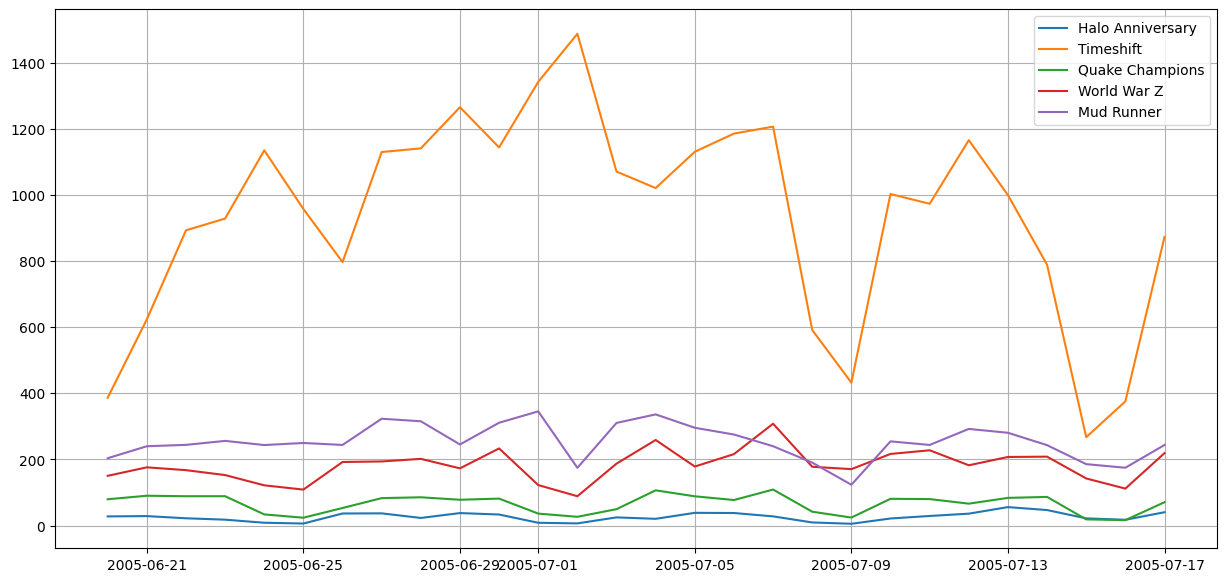

In [ ]:
# Построим график с ежедневным потреблением
plt.figure(figsize=(15,7), edgecolor='red')
plt.plot(df_project['Halo Anniversary'], label='Halo Anniversary')
plt.plot(df_project['Timeshift'], label='Timeshift')
plt.plot(df_project['Quake Champions'], label='Quake Champions')
plt.plot(df_project['World War Z'], label='World War Z')
plt.plot(df_project['Mud Runner'], label='Mud Runner')
plt.grid()
plt.legend()
plt.show()

### Задача 4

Рассмотрим *еженедельное* общее потребление ресурсов. На второй неделе можно заметить всплеск нагрузки с ее последующим планомерным снижением.

Проанализируйте предоставленные данные и найдите, с чем связано подобное поведение.

In [ ]:
df_test.head()

,author,date,start,finish,week,work_time,project
0,Kenny Smith,2005-06-26,2005-06-26 09:05:45.716,2005-06-26 09:05:45.997,25,0.000078,Halo Anniversary
1,Kenny Smith,2005-06-26,2005-06-26 09:05:46.200,2005-06-26 09:05:46.497,25,0.000082,Halo Anniversary
2,Kenny Smith,2005-06-26,2005-06-26 09:05:47.357,2005-06-26 09:06:01.213,25,0.003849,Halo Anniversary
3,Kenny Smith,2005-06-26,2005-06-26 09:06:19.273,2005-06-26 09:10:44.734,25,0.073739,Halo Anniversary
4,Kenny Smith,2005-06-26,2005-06-26 09:12:00.883,2005-06-26 09:14:29.941,25,0.041405,Halo Anniversary


In [ ]:
df_all = df_test[['date', 'work_time']].set_index('date')

In [ ]:
df_all = df_all.resample(rule='D').sum()

In [ ]:
df_all = df_all.reset_index()

In [ ]:
df_all['day_of_week'] = pd.to_datetime(df_all['date']).dt.day_of_week

In [ ]:
df_all = df_all.set_index('date')

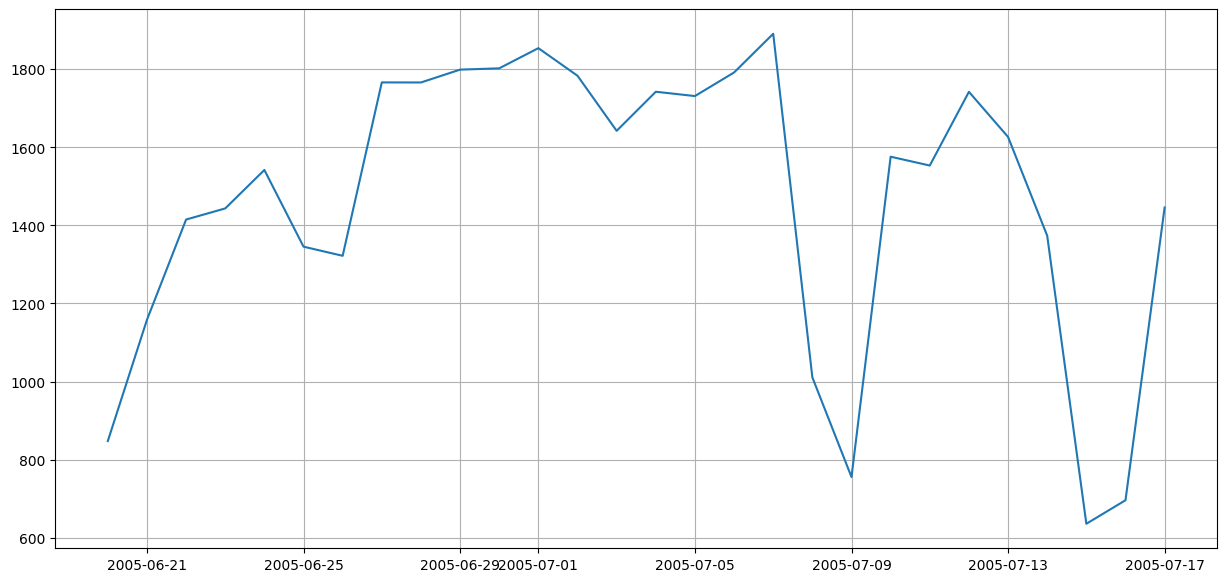

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(df_all['work_time'])
plt.grid()
plt.show()

In [ ]:
df_all['2005-07-01':'2005-07-09']

,work_time,day_of_week
date,,
2005-07-01,1853.867677,4
2005-07-02,1783.212387,5
2005-07-03,1642.161477,6
2005-07-04,1742.234680,0
2005-07-05,1731.179768,1
2005-07-06,1791.600174,2
2005-07-07,1890.686561,3
2005-07-08,1010.839259,4
2005-07-09,755.645579,5


***Явных признаков снижения кроме того, что снижение приходится на начало уикэнда, не видно.***